# Cargar Datos

In [226]:
import pandas as pd

# Ruta al archivo
ruta = 'dataset/stocks/TWTR.csv'

# Cargar el dataset
df = pd.read_csv(ruta)

# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna de fecha como índice
df.set_index('Date', inplace=True)

# Establecer la frecuencia del índice
df = df.asfreq('ME') # D: Diario, ME: Mensual, YE: Anual

# # Filtrar la fecha
# start_date = '2012-01-01'
# df = df.loc[start_date:]

# Comprobar valores nulos
print(df.isnull().sum())

# Rellenar valores nulos si existen (interpolación)
if df.isnull().sum().sum() > 0:
    df.interpolate(method='linear', inplace=True) # linear, pchip...

    # Visualizar valores nulos
    print(df.isnull().sum())

df = df.dropna()

# Visualizar el dataset
print(df.head())

Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0
2014-04-30  37.660000  38.980000  37.240002  38.970001  38.970001  38397900.0


# SMA Simple Moving Average

In [227]:
df['6M-SMA'] = df['Close'].rolling(window=6).mean()
df['12M-SMA'] = df['Close'].rolling(window=12).mean()

print(df.head(15))

                 Open       High        Low      Close  Adj Close  \
Date                                                                
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002   
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000   
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   
2014-04-30  37.660000  38.980000  37.240002  38.970001  38.970001   
2014-05-31  39.235001  40.160000  38.795000  39.970001  39.970001   
2014-06-30  40.810001  41.340000  40.349998  40.970001  40.970001   
2014-07-31  44.619999  45.840000  44.299999  45.189999  45.189999   
2014-08-31  48.309999  49.014999  47.734999  48.385000  48.385000   
2014-09-30  52.000000  52.189999  51.169998  51.580002  51.580002   
2014-10-31  42.689999  42.849998  41.340000  41.470001  41.470001   
2014-11-30  39.289999  39.670000  38.405001  38.670000  38.670000   
2014-12-31  35.889999  36.490002  

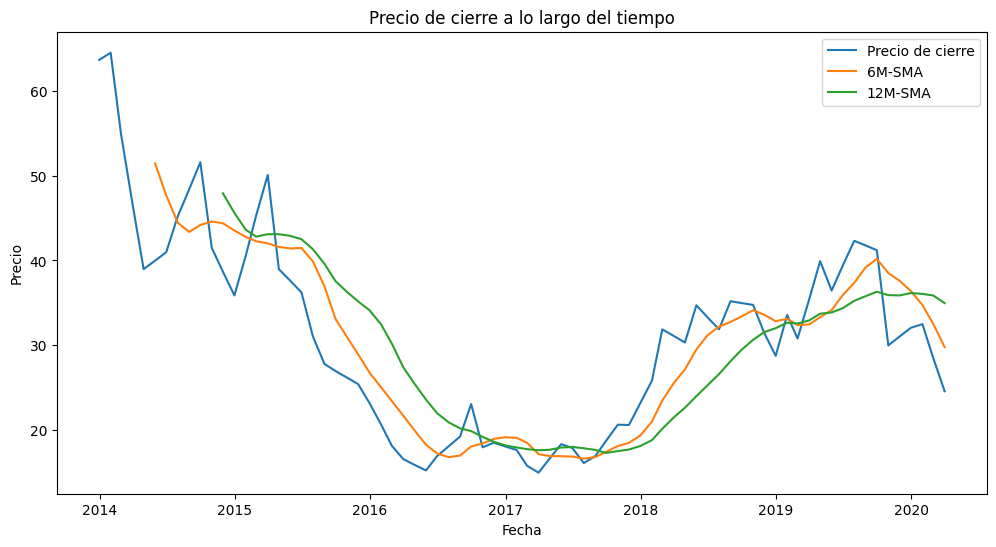

In [228]:
import matplotlib.pyplot as plt

# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.plot(df['6M-SMA'], label='6M-SMA')
plt.plot(df['12M-SMA'], label='12M-SMA')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# EWMA Exponentially Weighted Moving Average

In [229]:
df['12M-EWMA'] = df['Close'].ewm(span=12,adjust=False).mean()

print(df.head())

# from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# 
# span = 12
# alpha = 2/(span+1)
# 
# df['SES12']=SimpleExpSmoothing(df['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0   
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0   
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0   
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0   
2014-04-30  37.660000  38.980000  37.240002  38.970001  38.970001  38397900.0   

            6M-SMA  12M-SMA   12M-EWMA  
Date                                    
2013-12-31     NaN      NaN  63.650002  
2014-01-31     NaN      NaN  63.780771  
2014-02-28     NaN      NaN  62.416037  
2014-03-31     NaN      NaN  59.993569  
2014-04-30     NaN      NaN  56.759174  


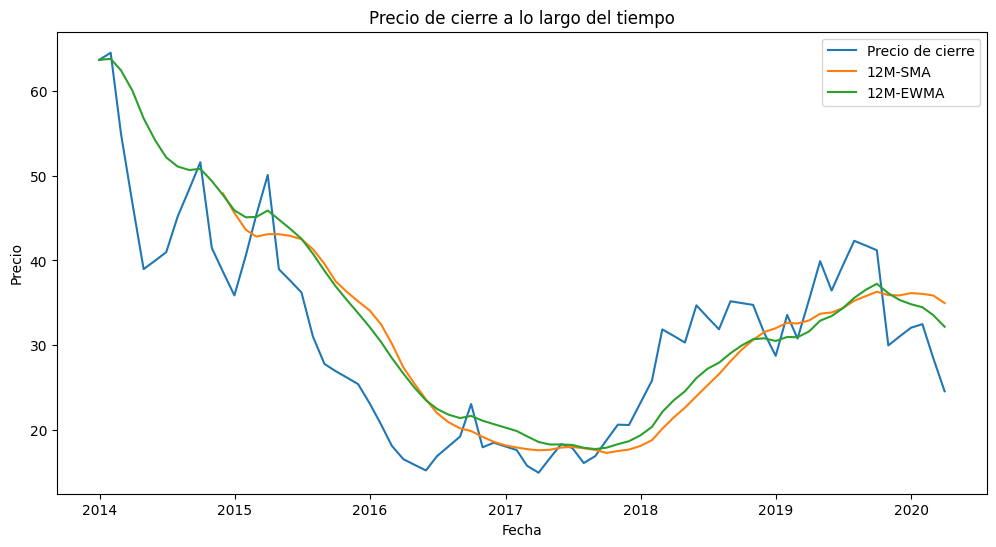

In [230]:
# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.plot(df['12M-SMA'], label='12M-SMA')
plt.plot(df['12M-EWMA'], label='12M-EWMA')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Suavizado Exponencial Doble

In [231]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['12M-DES'] = ExponentialSmoothing(df['Close'], trend = 'add').fit().fittedvalues.shift(-1)
print(df.head())

                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0   
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0   
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0   
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0   
2014-04-30  37.660000  38.980000  37.240002  38.970001  38.970001  38397900.0   

            6M-SMA  12M-SMA   12M-EWMA    12M-DES  
Date                                               
2013-12-31     NaN      NaN  63.650002  63.128866  
2014-01-31     NaN      NaN  63.780771  63.978865  
2014-02-28     NaN      NaN  62.416037  54.388865  
2014-03-31     NaN      NaN  59.993569  46.148863  
2014-04-30     NaN      NaN  56.759174  38.448866  


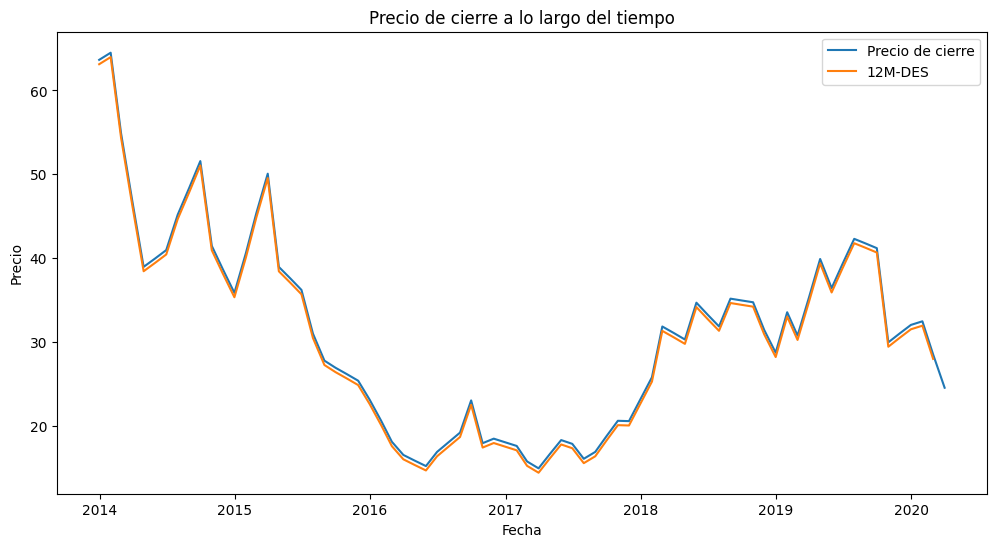

In [232]:
# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.plot(df['12M-DES'], label='12M-DES')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Suavizado Exponencial Triple

In [233]:
model_TES = ExponentialSmoothing(df['Close'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit()
df['12M-TES'] = model_TES.fittedvalues
print(df.head())

                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0   
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0   
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0   
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0   
2014-04-30  37.660000  38.980000  37.240002  38.970001  38.970001  38397900.0   

            6M-SMA  12M-SMA   12M-EWMA    12M-DES    12M-TES  
Date                                                          
2013-12-31     NaN      NaN  63.650002  63.128866  63.650066  
2014-01-31     NaN      NaN  63.780771  63.978865  65.636389  
2014-02-28     NaN      NaN  62.416037  54.388865  59.766294  
2014-03-31     NaN      NaN  59.993569  46.148863  52.303147  
2014-04-30     NaN      NaN  56.759174  38.448866  41.

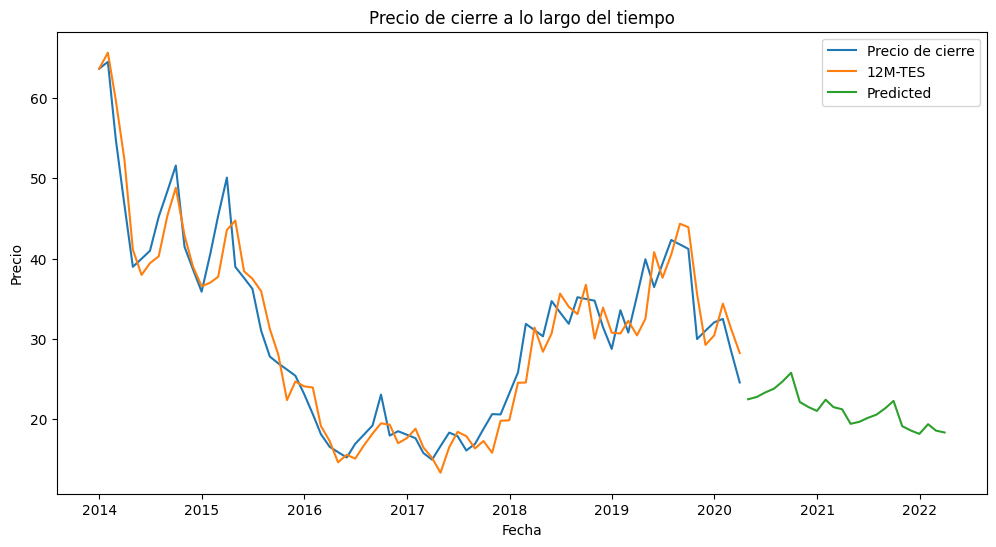

In [234]:
values = model_TES.forecast(24)
# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.plot(df['12M-TES'], label='12M-TES')
plt.plot(values, label='Predicted')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()